# Q. 81-84
85-90は画像処理の話から外れるのでパス。

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

## Q. 81. Hessian matrix


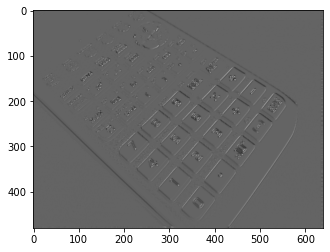

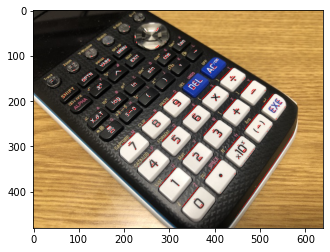

In [2]:
from skimage.feature import hessian_matrix_det
cimg = cv2.imread('Calc.jpg')
gimg = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
detimg = hessian_matrix_det(gimg, sigma = 2)
plt.imshow(detimg, cmap = 'gray')
th = detimg.max()*0.2
detimg[detimg < th] = 0
plt.figure()
cimg[detimg > th] = [0, 0, 255]
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))

## Q. 82-83. Harris corner detector
しきい値は適当

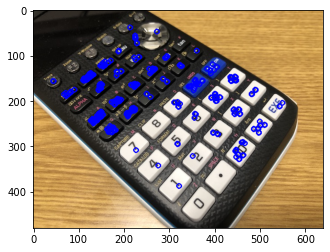

In [3]:
cimg = cv2.imread('Calc.jpg')
gimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)
corner = cv2.cornerHarris(gimg, 2, 3, 0.04)
threshold = 0.01
for j in range(corner.shape[0]):
    for i in range(corner.shape[1]):
        if (corner[j, i] > threshold):
            cv2.circle(cimg, (i,j), 5, (255,0,0), 2)
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))

## Q. 84
階調を落としてヒストグラムを求めて，ヒストグラムを連結する。が，実際はbinを4に指定して，NumPyのconcatenateを実行すれば良い。

In [4]:
import numpy as np
img = cv2.imread('Calc.jpg')
bh = cv2.calcHist([img], [0], None, [4], [0, 256])
gh = cv2.calcHist([img], [1], None, [4], [0, 256])
rh = cv2.calcHist([img], [2], None, [4], [0, 256])
f = np.concatenate((bh, gh, rh), None)
print(f)

[120493. 129053.  20823.  36831. 108819.  41078. 114444.  42859. 107610.
  29795.  41257. 128538.]
